**Ejercicio #1** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [5]:
#######tu codigo aqui (~ 5 lineas de codigo):
import numpy as np
xs1 = np.arange(0,0.5,0.1)
xs2 = np.arange(0.52,0.60,0.04)
xs3 = np.arange(0.6,0.9,0.1)
xs= np.hstack((xs1,xs2,xs3))
print(xs)

[0.   0.1  0.2  0.3  0.4  0.52 0.56 0.6  0.7  0.8  0.9 ]


**Ejercicio (parte de tarea)** 
En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

[ 0.11269147  0.08570871  0.20252057 ... -0.15854895 -0.09933548
  0.00087399]


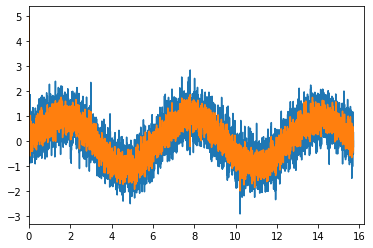

In [52]:
import numpy as np
import matplotlib.pyplot as plt
sample_points = 10000
inicio_intervalo = 0
ruido = 0.5*np.random.randn(sample_points) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

#ys es "y suavizado", inicialmente es una copia de y
ys =  y.copy()

def slicing1(ini, n = 3):
    cumsum = np.cumsum(ini)
    cumsum[n:] = cumsum[n:] - cumsum[:-n]
    print  (cumsum[n - 1:] / n)
  
    return (cumsum[n-1:] / n)


ys = slicing1(y)
ys[2] = 5


plt.plot(x,y)
plt.plot(x[1:-1],ys)
plt.xlim(inicio_intervalo,5*np.pi + 0.5)
plt.show()

### Ejercicio 
Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5 , 0.31127812]

Nota: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

𝑆=−∑𝑖𝑛𝑃(𝑥𝑖)𝑙𝑜𝑔2𝑃(𝑥𝑖)

In [62]:
def probabilidad_x(x):
    y=-(x * np.log2(x))
    return (y)

probabilidad_x([0.25,0.75])

array([0.5       , 0.31127812])

### Ejercicio

In [66]:
def lifetime_value(ganancias_mensuales):
    ## tu codigo aqui(~ 1 linea de codigo):
      return np.cumsum(ganancias_mensuales)
        

# Prueba:
ganancias_usuario = np.array([25,150,125,75,100,45,22,30])
lifetime_value_usuario = lifetime_value(ganancias_usuario)

print("Lifetime value:",lifetime_value_usuario)

print("El valor del usuario a su sexto mes es :",lifetime_value_usuario[5])

Lifetime value: [ 25 175 300 375 475 520 542 572]
El valor del usuario a su sexto mes es : 520


### Ejercicio
Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

tip investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

def mode(x):

In [80]:
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
   
    
    valor, conteo = np.unique(x, return_counts=True)
    indice = np.argmax(conteo)
    
    return valor[indice]
    

    
print(mode(x))

0.0


**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [85]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo)
      return np.sum(-(Y * np.log(Y_hat)))
    

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1]) # <- resultado de algun modelo predictivo

cross_entropy(y,y_hat)

0.35667494393873245

### Magnitud de un Vector(norma o módulo)
Ya hemos visto que en DS usamos vectores para representar información ,una propiedad importante de los vectores es la **magnitud** del vector. 

Matemáticamente la magnitud de un vector(también conocida como norma vectorial)  nos indica  el tamaño de este , y nos sirve para tener una noción de la distancia desde un punto de referencia(origen) hasta el punto representado por el vector.



<img src="http://mathonline.wdfiles.com/local--files/the-norm-of-a-vector/Screen%20Shot%202014-06-12%20at%205.37.19%20PM.png">

Se puede calcular con:

<img src="https://images.slideplayer.com/18/6074185/slides/slide_4.jpg">

En DS la interpretación de la magnitud depende del problema y significado del vector sobre el que se trabaje, ademas de ser también utilizada en calculos mas complejos,por ejemplo: **similitud por cosenos**.

<img src="https://machinelearningflashcards.com/images/L2_Norm_print.png">


Algunos ejemplos:
* En machine learning:
    * Si almacenamos en 2 vectores los errores producidos por 2 modelos de ML , podemos usar la magnitud de estos para determinar cual de los 2 modelos es mejor.
    * Cuando un modelo de ML "memoriza" en lugar de "aprender" decimos que sufre "overfitting" una forma de atacar este problema es usar "L2 regularization" que consiste en agregar a la "función de costo" un término de penalización que es calculado a partir de la magnitud de parámetros del modelo(cuadrado de la magnitud)
    
    <img src="https://cdn-images-1.medium.com/max/1600/1*JP9VzwxsRXjocb3WgVOTxA.png">
    * Un paso de pre-procesamiento común en ML es aplicar "normalización" a los datos, esto se logra(entre otras formas) dividiendo el vector de datos dentro de su magnitud de manera que tenga magnitud 1.
    
* En NLP(natural language processing): es común representar documentos como vectores n dimensionales, donde n es el número de palabras en cierto vocabulario, cada elemento "i" del vector indica cuantas veces aparece en el documento la palabra denotada por la posición "i" , podemos  usar la magnitud vectorial  para calcular la **similitud cosenoidal** y así estimar que tanto se  parece en contenido un documento a otro.
<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/10/Cosine-Similarity-Formula-1.png">

**ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [107]:
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
     return np.sqrt(np.sum(np.power(x,2))) # raiz cuadrada
    

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #


##print(magnitud(errores_modelo1))
##print(magnitud(errores_modelo2))

# elegir el mejor modelo con una condicional(if)
if magnitud(errores_modelo1) > magnitud(errores_modelo2):
  print ("El mejor modelo es: Modelo 2 porque tiene la menor cantidad de error")
else:
  print ("El mejor modeloes: Modelo 1 porque tiene la menor cantidad de error")

El mejor modelo es: Modelo 2 porque tiene la menor cantidad de error


### Ejercicio**
Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [116]:
def normalizar(x):
    Resultado =x/magnitud(x)
    return Resultado 

print(normalizar(errores_modelo1))

print(magnitud(normalizar(errores_modelo1)))

[0.31622777 0.63245553 0.31622777 0.63245553]
1.0


**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

In [127]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) 
y = np.sin(x) + ruido

filtro = np.array([1/3,1/3,1/3]) #para lograr las medias moviles a traves de correlacion cruzada

## tu codigo aqui (~ 3 linea de codigo)
np.dot(x,y)


-11.99510011627816

**Ejercicio** dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

**nota** No se puede usar np.abs() ni ciclos

**tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [ ]:
x = np.linspace(-2,2,9)


## tu codigo aqui (~ 4 linea de codigo)
### ver cuales elementos son negativos <- vector booleanos
### multiplicar esos elementos por -1
### usando el vector del rpimer paso remplazar los que eran negativos por su valor calculado en paso 2

**ejercicio** Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [151]:
def h(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    x[x<0] =0
    x[(x>=0) & (x<=1)] = 1
    x[x>1] = 0

    ##
    return x

x = np.array([0.1,-2,0.5,5])
print(h(x))

[1. 1. 1. 0.]


**Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$

In [150]:
def k(x):
    condicion1= x[x<0] = -x
    condicion2= x[(x>=0) & (x<1)] = np.power(x,3)
    condicion3= x[(x>=1) & (x<2)] = np.power(x,2)
  
    
    y = np.select(condicion1,condicion2,condicion3)
    return y
 

##### Select y performance
Aun que select es muy conveniente y útil , no es la opción mas eficiente esto debido a que evalua todas las condiciones y todos los resultados, en programación en general buscamos escribir los programas de la manera mas eficiente posible y evitar calculos innecesarios, esto se vuelve vital en ciencia de datos cuando procesamos grandes volúmenes de información, por eso NumPy nos provee la alternativa a select llamada **piecewise** que funciona de manera similar .


Este funciona similar a select pero en vez de calcular todos los posibles resultados, calcula solo aquellos para los que la condición es True e ignora los False,sintácticamente piecewise requiere que los "resultados" sesan calcuados usando una lista de funciones por lo cual todos los resultados deben estar contenidos en una función  y el objeto función ser enviado a piecewise (si la función solo se utiliza una vez para este propósito, se puede usar funciones anónimas o lambda).

**Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x>=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

### Proyeccion Vectorial:

In [6]:
import numpy as np
def proyeccionVectorial(x,y):
    ##Proyeccion de X sobre Y
    z = y * np.dot(x, y) / np.dot(y, y)
    return z


In [7]:
x = np.array([ 3, -4,  0])
y = np.array([10,  5, -6])
proyeccionVectorial(x,y)

array([ 0.62111801,  0.31055901, -0.37267081])

#### Interpretaciòn:
Es el punto en donde se corta un recta de un vector en relaciòn al otro vector.
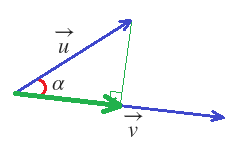
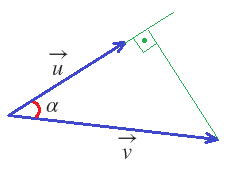

Referencia:

https://www.javaer101.com/es/article/1096280.html

https://ekuatio.com/proyeccion-de-un-vector-sobre-otro-vector-ejercicios-resueltos/#:~:text=En%20el%20caso%20de%20la,vector%20unitario%20del%20vector%20v.&text=Al%20dividir%20un%20vector%20entre,que%20es%20un%20vector%20unitario.

### Producto Cruz:


In [8]:
import numpy as np
a = np.array([1,0,0]) 
b = np.array([0,1,0]) 
c = np.cross(a,b)
print (c)

[0 0 1]


#### Interpretacion:
Es la multiplicacion de dos vectores y el resultado es un tercer Vector. El cual se puede obtener con el seno del àngulo entre A y B. Descomponiendo el componente de B horizontal de B y el perpendicular de B respecto a A y nos quedamos con la componente vertical

Ej:
A = (a1, a2, a3)

B = (b1, b2, b3) 

AxB = (a2b3 – a3b2 , a3b1 – a1b3 , a1b2 – a2b1)

Referencia

https://es.coursera.org/lecture/fisica-universitaria/producto-cruz-bQj1e

https://www.lifeder.com/producto-cruz-vectorial/